In [1]:

import pandas as pd
import numpy as np
from IPython.display import display
from pathlib import Path

drive_link = "https://drive.google.com/file/d/13Pu4mG_n5aGwNoD0au-PUikJF94mnMh_/view?usp=sharing"

def gdrive_to_direct(link: str) -> str:

    if "id=" in link:
        file_id = link.split("id=")[-1]
    elif "/d/" in link:
        file_id = link.split("/d/")[1].split("/")[0]
    else:
        raise ValueError("❌ لینک گوگل‌درایو معتبر نیست. باید شامل '/d/' یا 'id=' باشد.")
    return f"https://drive.google.com/uc?id={file_id}"

# --- تبدیل لینک ---
data_url = gdrive_to_direct(drive_link)

# --- خواندن داده ---
try:
    df = pd.read_csv(data_url)
    print("✅ Data loaded successfully from Google Drive.")
except Exception as e:
    raise RuntimeError(f"❌ خطا در خواندن فایل: {e}")

# --- بررسی ---
print("Shape:", df.shape)
display(df.head(10))
print("\nInfo:")
df.info()

print("\n🔹 Numeric columns summary:")
display(df.describe(include=[np.number]).T)

cat_cols_all = df.select_dtypes(exclude=[np.number]).columns.tolist()
if len(cat_cols_all) > 0:
    print("\n🔹 Categorical columns summary:")
    display(df[cat_cols_all].describe(include=['object', 'category']).T)
else:
    print("\nℹ️ هیچ ویژگی غیرعددی در داده وجود ندارد.")


✅ Data loaded successfully from Google Drive.
Shape: (1000, 12)


region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   
5       2      41   39        0       17    78.0   2      16     0.0       1   
6       3      45   22        1        2    19.0   2       4     0.0       1   
7       2      38   35        0        5    76.0   2      10     0.0       0   
8       3      45   59        1        7   166.0   4      31     0.0       0   
9       1      68   41        1       21    72.0   1      22     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  
5       1        3  
6       5        2  
7       3        4  
8       5        3  
9       3        2


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB

🔹 Numeric columns summary:


count    mean         std   min   25%   50%   75%     max
region   1000.0   2.022    0.816200   1.0   1.0   2.0   3.0     3.0
tenure   1000.0  35.526   21.359812   1.0  17.0  34.0  54.0    72.0
age      1000.0  41.684   12.558816  18.0  32.0  40.0  51.0    77.0
marital  1000.0   0.495    0.500225   0.0   0.0   0.0   1.0     1.0
address  1000.0  11.551   10.086681   0.0   3.0   9.0  18.0    55.0
income   1000.0  77.535  107.044165   9.0  29.0  47.0  83.0  1668.0
ed       1000.0   2.671    1.222397   1.0   2.0   3.0   4.0     5.0
employ   1000.0  10.987   10.082087   0.0   3.0   8.0  17.0    47.0
retire   1000.0   0.047    0.211745   0.0   0.0   0.0   0.0     1.0
gender   1000.0   0.517    0.499961   0.0   0.0   1.0   1.0     1.0
reside   1000.0   2.331    1.435793   1.0   1.0   2.0   3.0     8.0
custcat  1000.0   2.487    1.120306   1.0   1.0   3.0   3.0     4.0


ℹ️ هیچ ویژگی غیرعددی در داده وجود ندارد.


آمار توصیفی داده‌ها (عددی):


count    mean         std   min   25%   50%   75%     max
region   1000.0   2.022    0.816200   1.0   1.0   2.0   3.0     3.0
tenure   1000.0  35.526   21.359812   1.0  17.0  34.0  54.0    72.0
age      1000.0  41.684   12.558816  18.0  32.0  40.0  51.0    77.0
marital  1000.0   0.495    0.500225   0.0   0.0   0.0   1.0     1.0
address  1000.0  11.551   10.086681   0.0   3.0   9.0  18.0    55.0
income   1000.0  77.535  107.044165   9.0  29.0  47.0  83.0  1668.0
ed       1000.0   2.671    1.222397   1.0   2.0   3.0   4.0     5.0
employ   1000.0  10.987   10.082087   0.0   3.0   8.0  17.0    47.0
retire   1000.0   0.047    0.211745   0.0   0.0   0.0   0.0     1.0
gender   1000.0   0.517    0.499961   0.0   0.0   1.0   1.0     1.0
reside   1000.0   2.331    1.435793   1.0   1.0   2.0   3.0     8.0
custcat  1000.0   2.487    1.120306   1.0   1.0   3.0   3.0     4.0


اطلاعات درباره نوع داده‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB

تعداد مقادیر گمشده در هر ستون (>0):
هیچ مقدار گمشده‌ای یافت نشد ✅

ویژگی‌های عددی: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
ویژگی‌های غیرعددی: []


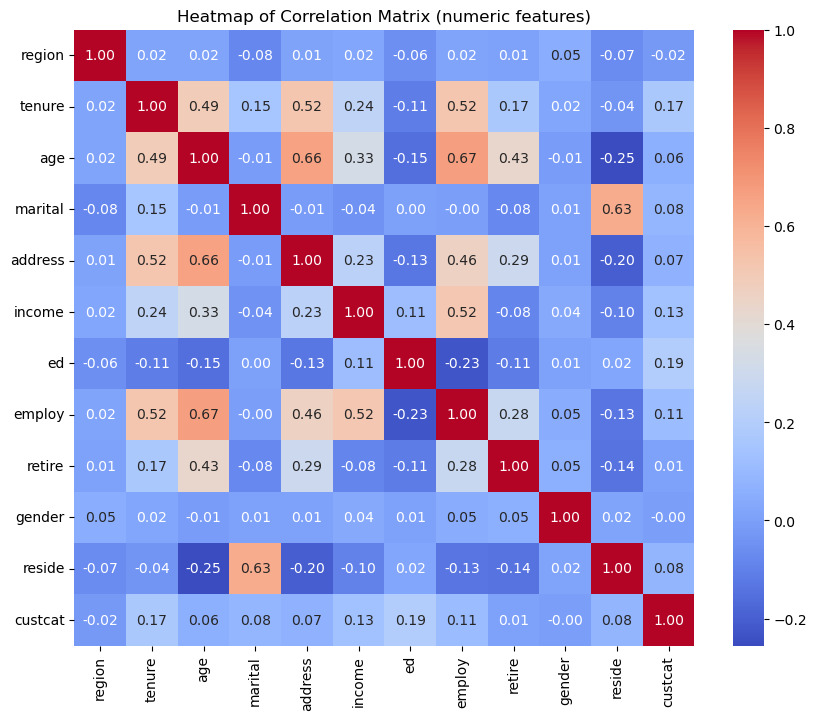

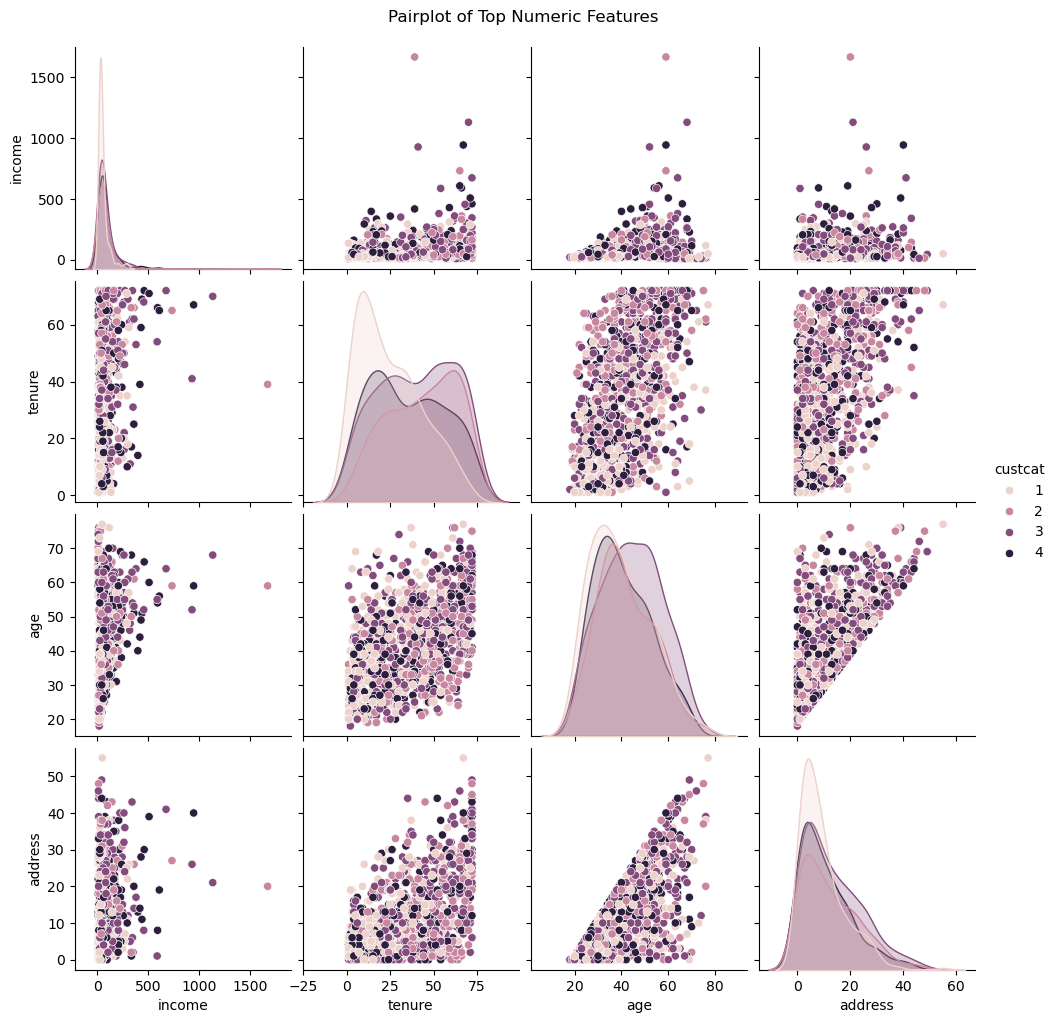

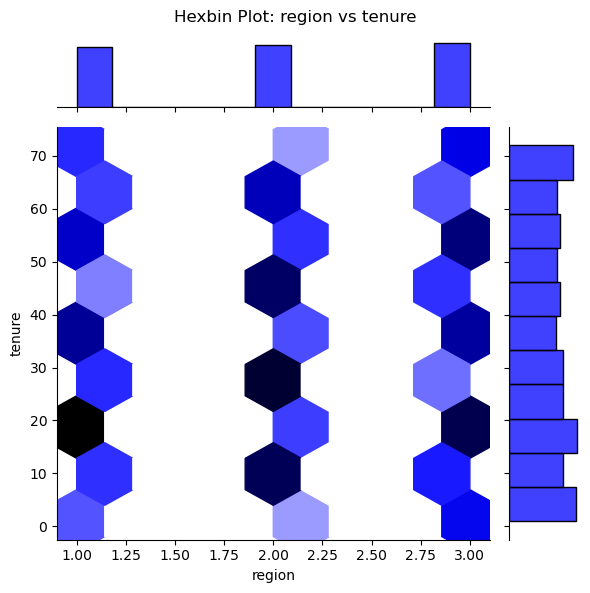

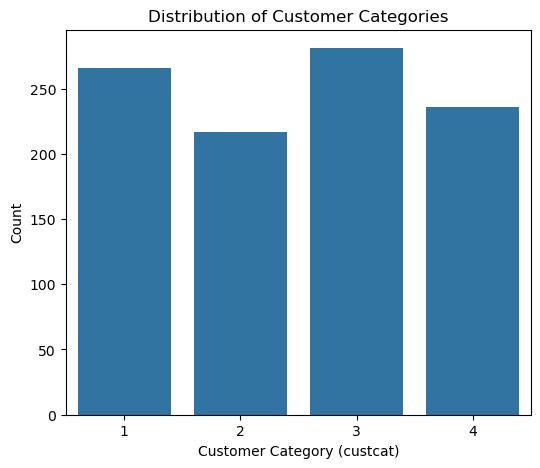

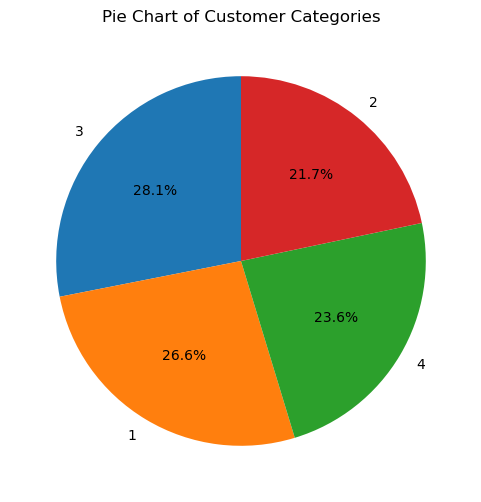

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# ستون هدف در این دیتاست
TARGET = 'custcat'

# 1️⃣ آمار توصیفی و info
print("آمار توصیفی داده‌ها (عددی):")
display(df.describe(include=[np.number]).T)
print("\nاطلاعات درباره نوع داده‌ها:")
df.info()

# 2️⃣ بررسی مقادیر گمشده (NaN)
na_counts = df.isna().sum().sort_values(ascending=False)
print("\nتعداد مقادیر گمشده در هر ستون (>0):")
print(na_counts[na_counts > 0] if (na_counts > 0).any() else "هیچ مقدار گمشده‌ای یافت نشد ✅")

# 3️⃣ تشخیص نوع ویژگی‌ها
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nویژگی‌های عددی:", num_cols)
print("ویژگی‌های غیرعددی:", cat_cols)

# 4️⃣ Heatmap همبستگی (فقط ستون‌های عددی)
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Heatmap of Correlation Matrix (numeric features)')
    plt.show()
else:
    print("📌 برای Heatmap حداقل دو ویژگی عددی لازم است.")

# 5️⃣ Pairplot برای چند ویژگی عددی برتر + رنگ بر اساس custcat
if len(num_cols) >= 2:
    top_nums = df[num_cols].var().sort_values(ascending=False).index.tolist()[:4]
    sns.pairplot(df[top_nums + [TARGET]], diag_kind='kde', hue=TARGET)
    plt.suptitle('Pairplot of Top Numeric Features', y=1.02)
    plt.show()
else:
    print("📌 برای Pairplot حداقل دو ویژگی عددی لازم است.")

# 6️⃣ Hexbin (یا jointplot) برای دو ویژگی عددی اول
if len(num_cols) >= 2:
    xcol, ycol = num_cols[0], num_cols[1]
    g = sns.jointplot(x=xcol, y=ycol, data=df, kind="hex", color="blue")
    g.fig.suptitle(f'Hexbin Plot: {xcol} vs {ycol}')
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.93)
    plt.show()
else:
    print("📌 برای Hexbin حداقل دو ویژگی عددی لازم است.")

# 7️⃣ توزیع کلاس‌ها (custcat)
plt.figure(figsize=(6, 5))
sns.countplot(x=TARGET, data=df)
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category (custcat)')
plt.ylabel('Count')
plt.show()

# Pie plot
plt.figure(figsize=(6, 6))
df[TARGET].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Customer Categories')
plt.ylabel('')
plt.show()


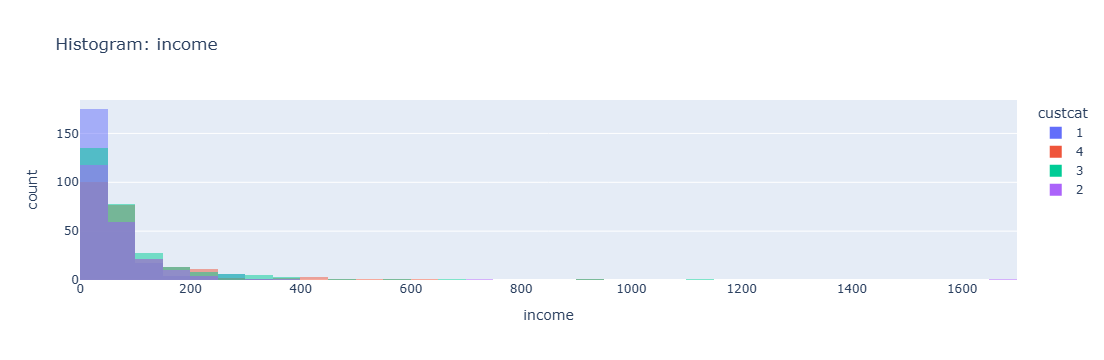

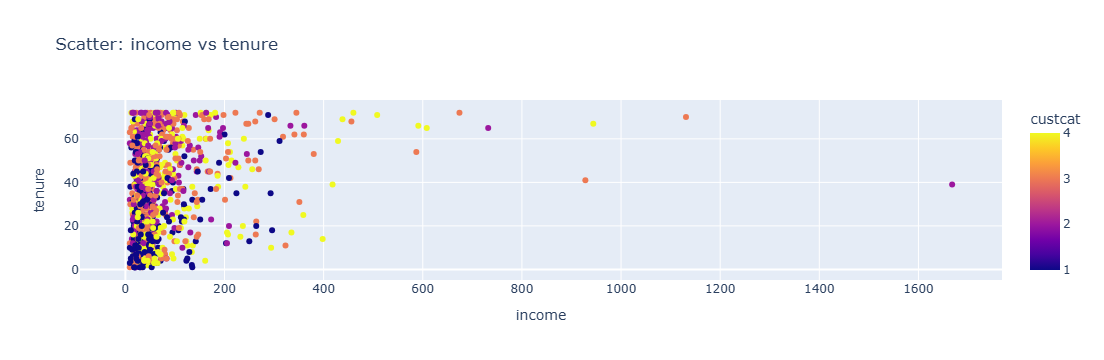

In [3]:
import plotly.express as px

key_num = top_nums[0] if len(top_nums) > 0 else (num_cols[0] if num_cols else None)
if key_num:
    fig = px.histogram(df, x=key_num, color=TARGET if TARGET else None, barmode='overlay', nbins=40, title=f'Histogram: {key_num}')
    fig.show()

if len(top_nums) >= 2:
    fig = px.scatter(df, x=top_nums[0], y=top_nums[1], color=TARGET if TARGET else None, title=f'Scatter: {top_nums[0]} vs {top_nums[1]}')
    fig.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from IPython.display import display

num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print(" ستون‌های عددی:")
print(num_cols)
print("\n ستون‌های طبقه‌ای:")
print(cat_cols)

label_encoders = {}
df_encoded = df.copy()

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("\n Label Encoding انجام شد. چند ستون اول:")
display(df_encoded[cat_cols].head())

scaling_method = 'standard'  

scaler = StandardScaler() if scaling_method == 'standard' else MinMaxScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(f"\n مقیاس‌دهی ({scaling_method}) برای داده‌های عددی انجام شد.")
display(df_encoded[num_cols].head())

dup_cols = df_encoded.columns[df_encoded.T.duplicated()].tolist()
constant_cols = [col for col in df_encoded.columns if df_encoded[col].nunique() == 1]

print("\n ستون‌های تکراری:", dup_cols)
print(" ستون‌های با مقدار ثابت:", constant_cols)

to_drop = dup_cols + constant_cols
if to_drop:
    df_encoded.drop(columns=to_drop, inplace=True)
    print(f" ستون‌های غیرمفید حذف شدند: {to_drop}")
else:
    print(" هیچ ویژگی غیرمفید یا تکراری وجود ندارد.")


print("\n شکل داده پس از پیش‌پردازش:", df_encoded.shape)
display(df_encoded.head())


 ستون‌های عددی:
['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']

 ستون‌های طبقه‌ای:
[]

 Label Encoding انجام شد. چند ستون اول:


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


 مقیاس‌دهی (standard) برای داده‌های عددی انجام شد.


region    tenure       age   marital   address    income        ed  \
0 -0.026968 -1.055125  0.184505  1.010051 -0.253034 -0.126506  1.087753   
1  1.198836 -1.148806 -0.691812  1.010051 -0.451415  0.546450  1.906227   
2  1.198836  1.521092  0.821826  1.010051  1.234819  0.359517 -1.367671   
3 -0.026968 -0.118319 -0.691812 -0.990050  0.044536 -0.416251 -0.549196   
4 -0.026968 -0.586722 -0.930808  1.010051 -0.253034 -0.444291 -1.367671   

     employ    retire    gender    reside   custcat  
0 -0.594123 -0.222076 -1.034598 -0.230650 -1.327980  
1 -0.594123 -0.222076 -1.034598  2.556662  1.351199  
2  1.787528 -0.222076  0.966559 -0.230650  0.458140  
3 -1.090300 -0.222076  0.966559 -0.927478 -1.327980  
4 -0.891829 -0.222076 -1.034598  1.163006  0.458140


 ستون‌های تکراری: []
 ستون‌های با مقدار ثابت: []
 هیچ ویژگی غیرمفید یا تکراری وجود ندارد.

 شکل داده پس از پیش‌پردازش: (1000, 12)


region    tenure       age   marital   address    income        ed  \
0 -0.026968 -1.055125  0.184505  1.010051 -0.253034 -0.126506  1.087753   
1  1.198836 -1.148806 -0.691812  1.010051 -0.451415  0.546450  1.906227   
2  1.198836  1.521092  0.821826  1.010051  1.234819  0.359517 -1.367671   
3 -0.026968 -0.118319 -0.691812 -0.990050  0.044536 -0.416251 -0.549196   
4 -0.026968 -0.586722 -0.930808  1.010051 -0.253034 -0.444291 -1.367671   

     employ    retire    gender    reside   custcat  
0 -0.594123 -0.222076 -1.034598 -0.230650 -1.327980  
1 -0.594123 -0.222076 -1.034598  2.556662  1.351199  
2  1.787528 -0.222076  0.966559 -0.230650  0.458140  
3 -1.090300 -0.222076  0.966559 -0.927478 -1.327980  
4 -0.891829 -0.222076 -1.034598  1.163006  0.458140

In [7]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn

print("scikit-learn version:", sklearn.__version__)
file_path = r"C:\Users\Razan kala\Downloads\teleCust1000t.csv"
assert os.path.exists(file_path), "مسیر فایل اشتباه است."

df = pd.read_csv(file_path)
TARGET = 'custcat'  

# X, y
y = df[TARGET]
X = df.drop(columns=[TARGET])

# تشخیص نوع ستون‌ها
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

print('numeric:', num_cols)
print('categorical:', cat_cols)

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- پیش‌پردازش ---
numeric_tf = Pipeline([('scaler', StandardScaler())])

transformers = [('num', numeric_tf, num_cols)]

if len(cat_cols):
    # نسخه جدید sklearn:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    categorical_tf = Pipeline([('ohe', ohe)])
    transformers.append(('cat', categorical_tf, cat_cols))

preprocessor = ColumnTransformer(transformers, remainder='drop')


scikit-learn version: 1.6.1
numeric: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']
categorical: []


In [10]:
# 1) SelectFromModel با Logistic (L1)

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

l1_base = LogisticRegression(
    penalty='l1', solver='liblinear', max_iter=3000, class_weight='balanced'
)

pipe_l1 = Pipeline(steps=[
    ('prep', preprocessor),
    ('select', SelectFromModel(l1_base, threshold='median')),
    ('clf', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

pipe_l1.fit(X_train, y_train)
print("✅ L1-selection + Logistic آموزش دید.")


✅ L1-selection + Logistic آموزش دید.


In [12]:
# 2) RFECV روی Logistic Regression

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

rfe_est = LogisticRegression(solver='liblinear', max_iter=3000, class_weight='balanced')

rfecv = RFECV(
    estimator=rfe_est,
    step=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_weighted',
    n_jobs=-1
)

pipe_rfe = Pipeline(steps=[
    ('prep', preprocessor),
    ('rfecv', rfecv),
    ('clf', LogisticRegression(max_iter=3000, class_weight='balanced'))
])

pipe_rfe.fit(X_train, y_train)
print("✅ RFECV + Logistic آموزش دید.")


✅ RFECV + Logistic آموزش دید.


In [13]:
# %% [markdown]
# 3) مقایسهٔ L1 و RFE

from sklearn.metrics import accuracy_score, f1_score

def eval_model(pipe, name):
    y_tr_pred = pipe.predict(X_train)
    y_te_pred = pipe.predict(X_test)
    print(f"=== {name} ===")
    print(f"Train Acc: {accuracy_score(y_train, y_tr_pred):.3f} | Test Acc: {accuracy_score(y_test, y_te_pred):.3f}")
    print(f"Train F1 : {f1_score(y_train, y_tr_pred, average='weighted'):.3f} | Test F1 : {f1_score(y_test, y_te_pred, average='weighted'):.3f}\n")

eval_model(pipe_l1,  "L1-Select")
eval_model(pipe_rfe, "RFECV")

best_pipe = pipe_rfe if f1_score(y_test, pipe_rfe.predict(X_test), average='weighted') >= \
                      f1_score(y_test, pipe_l1.predict(X_test), average='weighted') else pipe_l1
best_name = "RFECV" if best_pipe is pipe_rfe else "L1-Select"
print("✅ مدل منتخب برای ادامه:", best_name)


=== L1-Select ===
Train Acc: 0.430 | Test Acc: 0.380
Train F1 : 0.428 | Test F1 : 0.380

=== RFECV ===
Train Acc: 0.430 | Test Acc: 0.400
Train F1 : 0.427 | Test F1 : 0.400

✅ مدل منتخب برای ادامه: RFECV


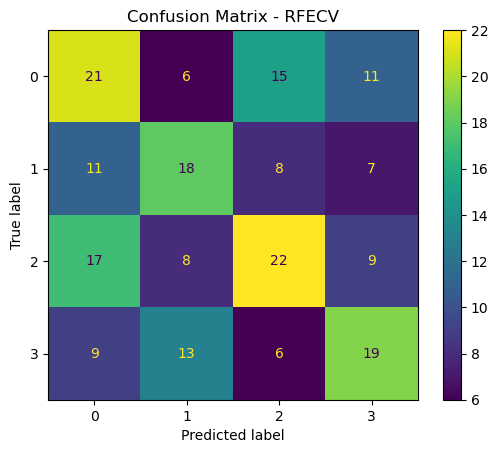

In [14]:
# %% [markdown]
# 4) Confusion Matrix برای مدل منتخب

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title(f'Confusion Matrix - {best_name}')
plt.show()


AUC (macro-ovr): 0.697


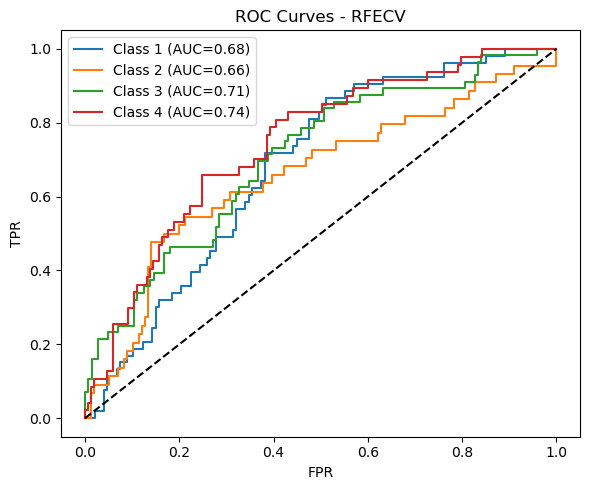

In [15]:
# %% [markdown]
# 5) ROC و AUC برای مسئله چندکلاسه (OvR)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

classes = np.sort(y_train.unique())
# احتمال کلاس‌ها:
y_proba = best_pipe.predict_proba(X_test)  # شکل: (n_samples, n_classes)

# AUC ماکرو (OvR)
auc_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
print(f"AUC (macro-ovr): {auc_macro:.3f}")

# رسم ROC برای هر کلاس
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(6,5))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC={auc(fpr,tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC Curves - {best_name}')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:

import numpy as np
import pandas as pd

def get_feature_names(preprocessor, num_cols, cat_cols):
    names = []
    if num_cols:
        names += list(num_cols)
    if cat_cols:
        ohe = preprocessor.named_transformers_['cat'].named_steps['ohe']
        names += list(ohe.get_feature_names_out(cat_cols))
    return names

preprocessor.fit(X_train)

feat_names_all = get_feature_names(preprocessor, num_cols, cat_cols)

if best_name == "L1-Select":
    selector = best_pipe.named_steps['select']
    mask = selector.get_support()
    used_feature_names = np.array(feat_names_all)[mask]
else:  # RFECV
    rfecv = best_pipe.named_steps['rfecv']
    mask = rfecv.support_
    used_feature_names = np.array(feat_names_all)[mask]

clf = best_pipe.named_steps['clf']
coefs = clf.coef_  # shape: (n_classes, n_features_selected)

imp = np.mean(np.abs(coefs), axis=0)
top_idx = np.argsort(imp)[::-1][:20]
top_feats = pd.DataFrame({
    'feature': used_feature_names[top_idx],
    'importance(|coef| mean)': imp[top_idx]
}).reset_index(drop=True)

print("🔝 مهم‌ترین ویژگی‌ها بر اساس قدرمطلق ضریب:")
display(top_feats)


🔝 مهم‌ترین ویژگی‌ها بر اساس قدرمطلق ضریب:


feature  importance(|coef| mean)
0      ed                 0.458045
1  tenure                 0.347935
2  income                 0.115963
3  employ                 0.112440
4  reside                 0.103473

In [19]:
# %% [markdown]
# آماده‌سازی داده برای کاهش بُعد (X, y آماده)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = r"C:\Users\Razan kala\Downloads\teleCust1000t.csv"
df = pd.read_csv(file_path)
TARGET = 'custcat'

X = df.drop(columns=[TARGET])
y = df[TARGET]

X = X.select_dtypes(include='number')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ داده آماده برای کاهش بُعد. شکل داده:", X_train.shape)


✅ داده آماده برای کاهش بُعد. شکل داده: (800, 11)


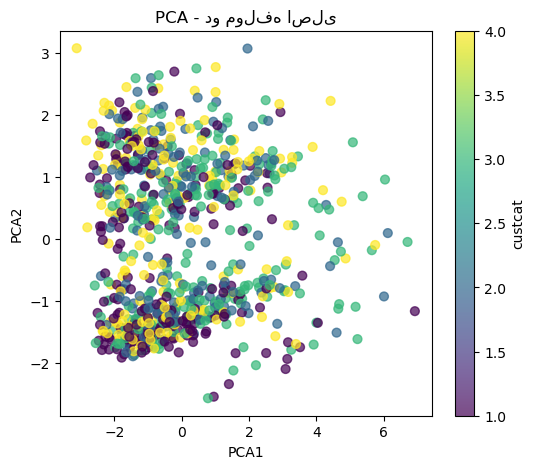

واریانس توضیح داده‌شده هر مؤلفه: [0.28317525 0.14655793]


In [20]:
# %% [markdown]
# 1) کاهش بُعد با PCA و نمایش Scatter دو بعد اول

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='viridis', s=40, alpha=0.7)
plt.title("PCA - دو مولفه اصلی")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='custcat')
plt.show()

print("واریانس توضیح داده‌شده هر مؤلفه:", pca.explained_variance_ratio_)


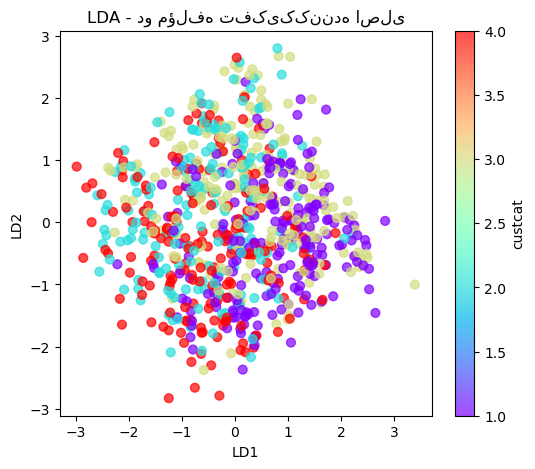

In [21]:
# %% [markdown]
# 2) کاهش بُعد با LDA و نمایش Scatter دو بعد اول

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

plt.figure(figsize=(6,5))
plt.scatter(X_lda[:,0], X_lda[:,1], c=y_train, cmap='rainbow', s=40, alpha=0.7)
plt.title("LDA - دو مؤلفه تفکیک‌کننده اصلی")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.colorbar(label='custcat')
plt.show()


تعداد لایه‌ها: 3
لایه 1: شکل وزن‌ها (11, 5)
لایه 2: شکل وزن‌ها (5, 2)
لایه 3: شکل وزن‌ها (2, 4)


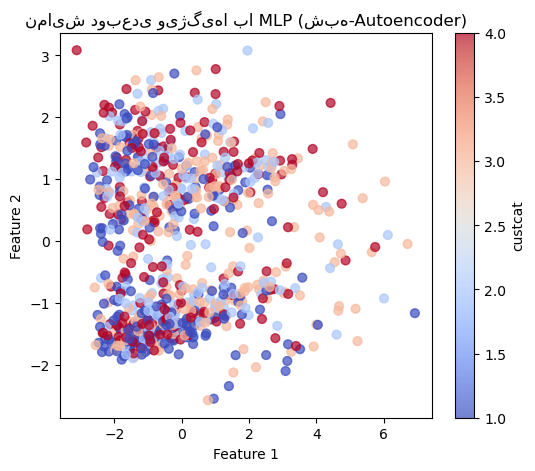

In [22]:
# %% [markdown]
# 3) کاهش بُعد با MLP (شبکه عصبی چند‌لایه)

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

# ساخت شبکه‌ی ساده (مثلاً 10 → 5 → 2 → 2کلاس)
mlp = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# لایه‌های شبکه را می‌توان بررسی کرد
print("تعداد لایه‌ها:", len(mlp.coefs_))
for i, w in enumerate(mlp.coefs_):
    print(f"لایه {i+1}: شکل وزن‌ها {w.shape}")

# برای نمایش دوبعدی ویژگی‌ها (به‌صورت شبیه‌سازی): 
# چون sklearn مستقیماً خروجی لایه میانی را نمی‌دهد، 
# از PCA روی وزن‌های لایه دوم برای نمایش استفاده می‌کنیم.
X_mlp = PCA(n_components=2).fit_transform(X_train)

plt.figure(figsize=(6,5))
plt.scatter(X_mlp[:,0], X_mlp[:,1], c=y_train, cmap='coolwarm', s=40, alpha=0.7)
plt.title("نمایش دوبعدی ویژگی‌ها با MLP (شبه-Autoencoder)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='custcat')
plt.show()


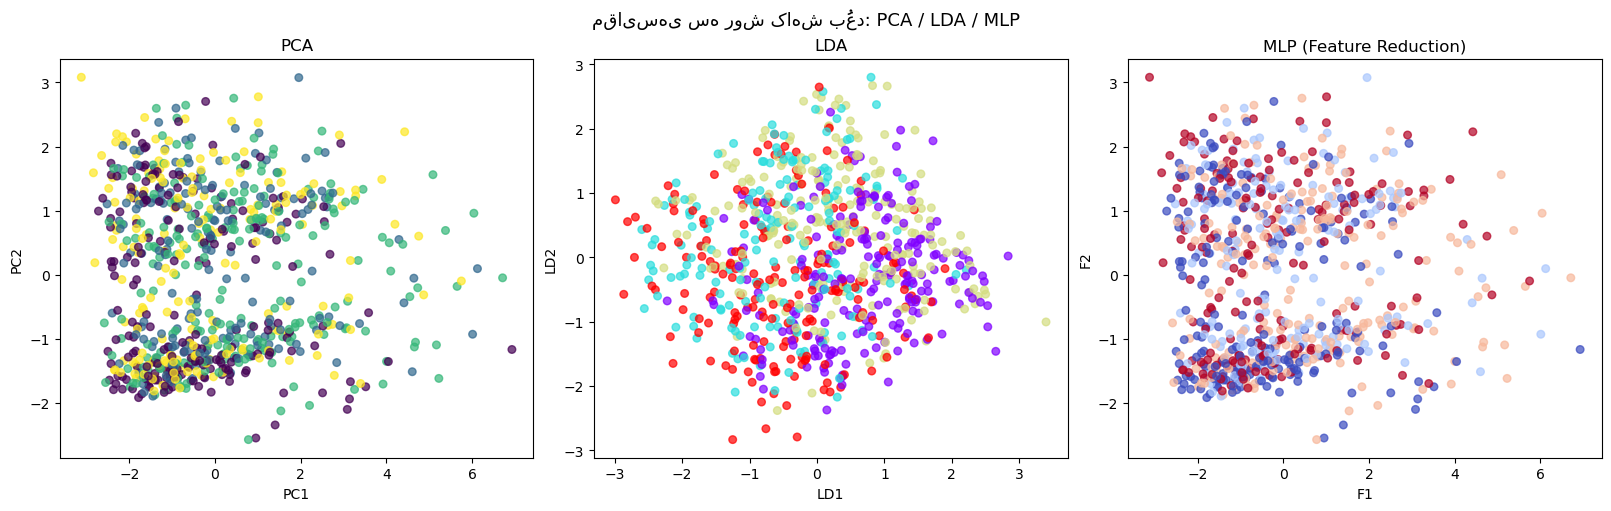

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)

# PCA
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='viridis', s=30, alpha=0.7)
axes[0].set_title('PCA')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# LDA
axes[1].scatter(X_lda[:,0], X_lda[:,1], c=y_train, cmap='rainbow', s=30, alpha=0.7)
axes[1].set_title('LDA')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')

# MLP
axes[2].scatter(X_mlp[:,0], X_mlp[:,1], c=y_train, cmap='coolwarm', s=30, alpha=0.7)
axes[2].set_title('MLP (Feature Reduction)')
axes[2].set_xlabel('F1')
axes[2].set_ylabel('F2')

fig.suptitle('مقایسه‌ی سه روش کاهش بُعد: PCA / LDA / MLP', fontsize=13)
plt.show()


In [24]:
# %% [markdown]
# 📈 محاسبه‌ی میزان تفکیک‌پذیری کلاس‌ها با شاخص Silhouette

from sklearn.metrics import silhouette_score

sil_pca = silhouette_score(X_pca, y_train)
sil_lda = silhouette_score(X_lda, y_train)
sil_mlp = silhouette_score(X_mlp, y_train)

print("Silhouette Scores:")
print(f"PCA : {sil_pca:.3f}")
print(f"LDA : {sil_lda:.3f}")
print(f"MLP : {sil_mlp:.3f}")

best_method = max([(sil_pca,'PCA'), (sil_lda,'LDA'), (sil_mlp,'MLP')], key=lambda x:x[0])
print(f"\n✅ روش با بهترین جداسازی کلاس‌ها: {best_method[1]} (امتیاز: {best_method[0]:.3f})")


Silhouette Scores:
PCA : -0.051
LDA : -0.046
MLP : -0.051

✅ روش با بهترین جداسازی کلاس‌ها: LDA (امتیاز: -0.046)
